# Ejercicio 3
## Integrante: Lautaro Rivieri

## 1. Desarrollar un diagrama de flujo, por ejemplo usando Dia, o alguna versión online.

Ejercicio3_Sumaarray.drawio.svg

## 2. Explicar, comentar las sentencias que no tienen comentarios.

In [ ]:
.MODEL SMALL             ; Definir modelo de memoria SMALL (código y datos separados)
.STACK 100h              ; Reservar 256 bytes para la pila
.DATA
    array   DW 2, 4, 6, 8, 10  ; Array de números de 16 bits
    count   DW 5               ; Cantidad de elementos en el array
    sum     DW 0               ; Variable para almacenar la suma
.CODE
START:
    MOV AX, @DATA        ; Cargar dirección del segmento de datos en AX
    MOV DS, AX           ; Inicializar DS con la dirección del segmento de datos

    MOV CX, [count]      ; Cargar el contador CX con la cantidad de elementos
    MOV SI, 0             ; Inicializar el índice SI en 0
    MOV AX, 0             ; Inicializar acumulador AX en 0 para la suma

SUM_LOOP:
    ADD AX, [array+SI]   ; Sumar el elemento del array apuntado por SI a AX
    ADD SI, 2             ; Incrementar SI en 2 (cada elemento es WORD = 2 bytes)
    LOOP SUM_LOOP         ; Decrementar CX y repetir el bucle mientras CX ≠ 0

    MOV [sum], AX         ; Guardar el resultado final de la suma en la variable sum

    MOV AH, 4Ch           ; Función de DOS para terminar programa
    INT 21h               ; Llamar a interrupción 21h
END START

## 3. Implementar en Turbo Asm.

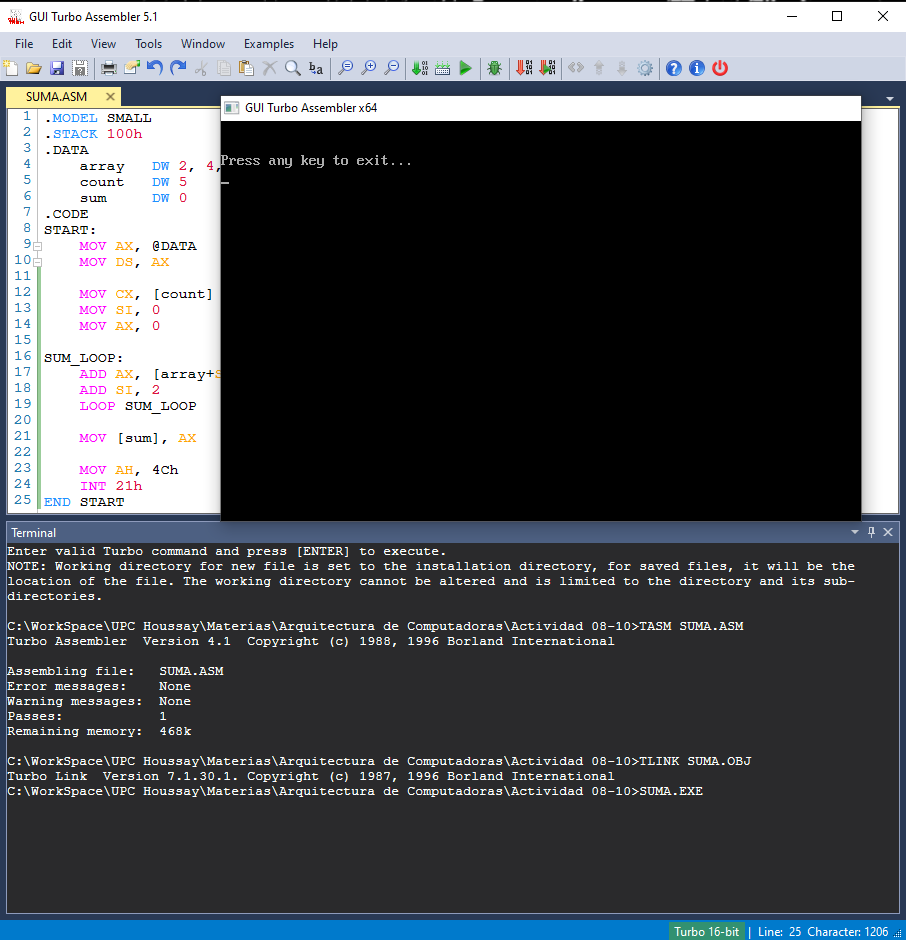

## 4. Implementar en linux. De no tener uno, usar Google Colab.

In [ ]:
section .data
    array   dw 2, 4, 6, 8, 10
    count   dw 5
    sum     dw 0

section .text
    global _start

_start:
    mov cx, [count]      ; Cargar el contador CX con la cantidad de elementos
    mov esi, 0           ; Usar ESI en lugar de SI para direcciones de 32 bits
    mov ax, 0            ; Inicializar acumulador AX en 0 para la suma

SUM_LOOP:
    mov bx, [array + esi] ; Cargar elemento en BX primero
    add ax, bx           ; Sumar BX a AX
    add esi, 2           ; Incrementar ESI en 2 (cada elemento es WORD = 2 bytes)
    loop SUM_LOOP        ; Decrementar CX y repetir el bucle mientras CX ≠ 0

    mov [sum], ax        ; Guardar el resultado final de la suma en la variable sum

    ; Exit syscall para Linux
    mov eax, 1           ; sys_exit
    mov ebx, 0           ; status 0
    int 0x80

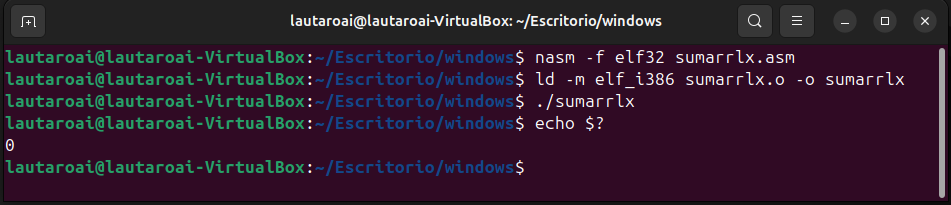

## 5. Pegar las sentencias usadas en linux para compilar y linkear.

In [ ]:
# Instalar nasm (si no está instalado)
sudo apt-get install nasm

# Compilar
nasm -f elf32 suma_array.asm

# Enlazar
ld -m elf_i386 suma_array.o -o suma_array

# Ejecutar
./suma_array

# Verificar el código de salida
echo $?

## 6. Investigar y agregar sentencias para ingresar valores por teclado en un par de ejercicios. Fibonacci y verificar números primos, otros…



In [ ]:
.MODEL SMALL             ; Definir modelo de memoria SMALL (c?digo y datos separados)
.STACK 100h              ; Reservar 256 bytes para la pila
.DATA
    array   DW 5 DUP(0)  ; Array de 5 n?meros de 16 bits, inicializados en 0
    count   DW 5         ; Cantidad de elementos en el array
    sum     DW 0         ; Variable para almacenar la suma
    msg1    DB 'Ingrese 5 numeros (0-65535):', 13, 10, '$'
    msg2    DB 'Numero $'
    msg3    DB ': $'
    msg4    DB 'La suma es: $'
    buffer  DB 7 DUP(0)  ; Buffer para entrada de n?meros
.CODE

; Procedimiento para convertir string a n?mero (WORD)
; Entrada: SI apunta al string
; Salida: AX = n?mero convertido
STRING_TO_WORD PROC
    PUSH BX
    PUSH CX
    PUSH DX
    PUSH SI

    MOV AX, 0
    MOV BX, 10           ; Base decimal

CONVERT_LOOP:
    MOV CL, [SI]         ; Obtener car?cter
    CMP CL, 0            ; Fin del string?
    JE CONVERT_DONE
    CMP CL, 13           ; Fin del string (Enter)?
    JE CONVERT_DONE
    CMP CL, '0'          ; Validar que sea d?gito
    JB CONVERT_DONE
    CMP CL, '9'
    JA CONVERT_DONE

    SUB CL, '0'          ; Convertir ASCII a n?mero
    MOV DX, AX           ; Guardar valor actual
    MOV AX, DX
    MUL BX               ; Multiplicar por 10 (AX = AX * 10)
    MOV AH, 0            ; Limpiar AH despu?s de multiplicar
    ADD AL, CL           ; Sumar nuevo d?gito
    ADC AH, 0            ; Manejar acarreo

    INC SI               ; Siguiente car?cter
    JMP CONVERT_LOOP

CONVERT_DONE:
    POP SI
    POP DX
    POP CX
    POP BX
    RET
STRING_TO_WORD ENDP

; Procedimiento para leer n?mero desde teclado
; Salida: AX = n?mero ingresado
READ_NUMBER PROC
    PUSH BX
    PUSH CX
    PUSH DX
    PUSH SI

    ; Limpiar buffer
    MOV CX, 6
    MOV SI, OFFSET buffer
CLEAR_BUFFER:
    MOV BYTE PTR [SI], 0
    INC SI
    LOOP CLEAR_BUFFER

    ; Leer string desde teclado
    MOV AH, 0Ah          ; Funci?n de lectura de buffer
    MOV DX, OFFSET buffer
    MOV buffer, 6        ; Longitud m?xima de entrada (5 d?gitos + Enter)
    INT 21h

    ; Convertir a n?mero
    MOV SI, OFFSET buffer + 2  ; Saltar los primeros 2 bytes del buffer
    CALL STRING_TO_WORD

    POP SI
    POP DX
    POP CX
    POP BX
    RET
READ_NUMBER ENDP

; Procedimiento para imprimir string
; Entrada: DX = offset del string
PRINT_STRING PROC
    PUSH AX
    MOV AH, 09h
    INT 21h
    POP AX
    RET
PRINT_STRING ENDP

; Procedimiento para imprimir n?mero en AX
PRINT_NUMBER PROC
    PUSH AX
    PUSH BX
    PUSH CX
    PUSH DX

    MOV CX, 0            ; Contador de d?gitos
    MOV BX, 10           ; Divisor

PUSH_DIGITS:
    MOV DX, 0
    DIV BX               ; AX = AX / 10, DX = resto
    PUSH DX              ; Guardar d?gito
    INC CX
    CMP AX, 0
    JNE PUSH_DIGITS

POP_DIGITS:
    POP DX
    ADD DL, '0'          ; Convertir a ASCII
    MOV AH, 02h          ; Funci?n imprimir car?cter
    INT 21h
    LOOP POP_DIGITS

    POP DX
    POP CX
    POP BX
    POP AX
    RET
PRINT_NUMBER ENDP

START:
    MOV AX, @DATA        ; Cargar direcci?n del segmento de datos en AX
    MOV DS, AX           ; Inicializar DS con la direcci?n del segmento de datos

    ; Mostrar mensaje inicial
    MOV DX, OFFSET msg1
    CALL PRINT_STRING

    ; Leer los 5 n?meros desde teclado
    MOV CX, [count]      ; Cargar contador
    MOV SI, 0            ; ?ndice del array

INPUT_LOOP:
    ; Mostrar "Numero X: "
    PUSH AX
    PUSH DX
    MOV DX, OFFSET msg2
    CALL PRINT_STRING

    ; Calcular y mostrar n?mero actual
    MOV AX, [count]
    SUB AX, CX
    INC AX               ; Empezar desde 1 en lugar de 0
    CALL PRINT_NUMBER

    MOV DX, OFFSET msg3
    CALL PRINT_STRING
    POP DX
    POP AX

    ; Leer n?mero
    CALL READ_NUMBER

    ; Guardar en array
    MOV [array+SI], AX
    ADD SI, 2            ; Siguiente posici?n (WORD = 2 bytes)

    ; Nueva l?nea
    PUSH AX
    PUSH DX
    MOV DL, 13
    MOV AH, 02h
    INT 21h
    MOV DL, 10
    MOV AH, 02h
    INT 21h
    POP DX
    POP AX

    LOOP INPUT_LOOP      ; Repetir para todos los n?meros

    ; Calcular suma
    MOV CX, [count]      ; Recargar contador
    MOV SI, 0            ; Reiniciar ?ndice
    MOV AX, 0            ; Inicializar acumulador

SUM_LOOP:
    ADD AX, [array+SI]   ; Sumar elemento del array
    ADD SI, 2            ; Siguiente posici?n
    LOOP SUM_LOOP        ; Repetir mientras CX ? 0

    MOV [sum], AX        ; Guardar resultado

    ; Mostrar resultado
    MOV DX, OFFSET msg4
    CALL PRINT_STRING

    MOV AX, [sum]
    CALL PRINT_NUMBER

    ; Nueva l?nea al final
    MOV DL, 13
    MOV AH, 02h
    INT 21h
    MOV DL, 10
    MOV AH, 02h
    INT 21h

    MOV AH, 4Ch          ; Funci?n de DOS para terminar programa
    INT 21h              ; Llamar a interrupci?n 21h

END START

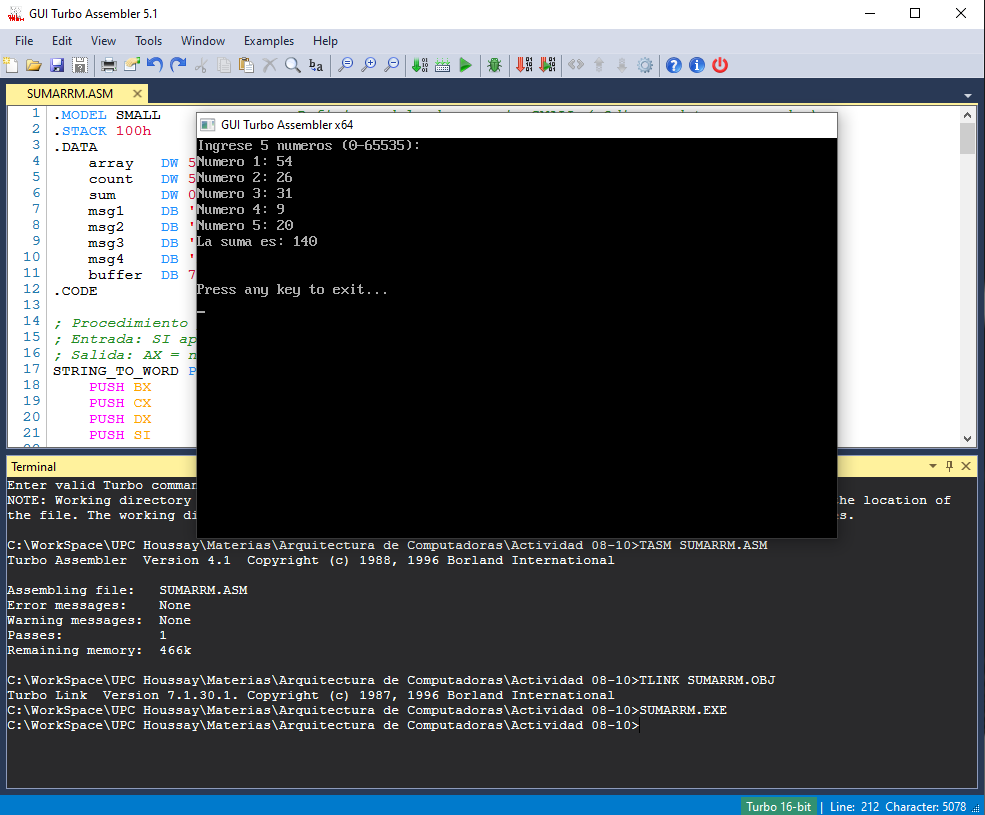

## 7. Generar en Google Colab, con la IA, la misma versión de problema, pero resuelto en C.
prompt --> [Deepseek](https://chat.deepseek.com/share/flktiwwgbsaed9sr86)

In [ ]:
%%writefile suma_array.c
#include <stdio.h>

int main() {
    short array[] = {2, 4, 6, 8, 10};
    int count = 5;
    int sum = 0;

    for (int i = 0; i < count; i++) {
        sum += array[i];
    }

    return 0;
}

Writing suma_array.c


## 8. Ejecutar y obtener el programa en lenguaje ensamblador. A partir del Ítem anterior


In [ ]:
# Compilar generando código ensamblador
!gcc -S -O0 suma_array.c -o suma_array.s

# Mostrar el código ensamblador generado
!cat suma_array.s

	.file	"suma_array.c"
	.text
	.globl	main
	.type	main, @function
main:
.LFB0:
	.cfi_startproc
	endbr64
	pushq	%rbp
	.cfi_def_cfa_offset 16
	.cfi_offset 6, -16
	movq	%rsp, %rbp
	.cfi_def_cfa_register 6
	subq	$32, %rsp
	movq	%fs:40, %rax
	movq	%rax, -8(%rbp)
	xorl	%eax, %eax
	movw	$2, -18(%rbp)
	movw	$4, -16(%rbp)
	movw	$6, -14(%rbp)
	movw	$8, -12(%rbp)
	movw	$10, -10(%rbp)
	movl	$5, -24(%rbp)
	movl	$0, -32(%rbp)
	movl	$0, -28(%rbp)
	jmp	.L2
.L3:
	movl	-28(%rbp), %eax
	cltq
	movzwl	-18(%rbp,%rax,2), %eax
	cwtl
	addl	%eax, -32(%rbp)
	addl	$1, -28(%rbp)
.L2:
	movl	-28(%rbp), %eax
	cmpl	-24(%rbp), %eax
	jl	.L3
	movl	$0, %eax
	movq	-8(%rbp), %rdx
	subq	%fs:40, %rdx
	je	.L5
	call	__stack_chk_fail@PLT
.L5:
	leave
	.cfi_def_cfa 7, 8
	ret
	.cfi_endproc
.LFE0:
	.size	main, .-main
	.ident	"GCC: (Ubuntu 11.4.0-1ubuntu1~22.04.2) 11.4.0"
	.section	.note.GNU-stack,"",@progbits
	.section	.note.gnu.property,"a"
	.align 8
	.long	1f - 0f
	.long	4f - 1f
	.long	5
0:
	.string	"GNU"
1:
	.align 8
	.long	0xc000

## 9. Comparar las versiones de ensamblador.

El compilador cruzado que tiene Google Colab genera el ensamblador en una arquitectura diferente (Linux 64-bit), mientras que el proporcionado como base es un ensamblador DOS de 16-bit. Si bien, ambas cuentan con la misma lógica, pero el generado en colab siempre será más complejo, mientras que el otorgado como consigna es más optimisado y simple.

Por si quiere indagar detalles más técnicos en la comparativa --> [deepseek](https://chat.deepseek.com/share/byvrch5uovn1139u8t)

## 10. Observar situaciones problemáticas e identificar metodología de resolución de problemas.

La verdad, siendo sincero, no tuve dificultades realizando este **Ejercicio 3**, ya que todas las dudas y el proceso lo pude naturalizar durante y luego de haber realizado el **Ejercicio 4**.

Lo que sí, como expiró el link del deepseek con las consignas, tuve que revisar los trabajos de mis compañeros parar buscar el código base de este ejercicio para arrancar, pero lo vi como la opción más viable ante este único problema.